In [10]:
%matplotlib notebook

In [11]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# path to csv files
pycity_file = "raw_data/city_data.csv"
pyride_file = "raw_data/ride_data.csv"

In [5]:
# reading the files and creating dataframe
pycity_df = pd.read_csv(pycity_file)
pyride_df = pd.read_csv(pyride_file)

# delete any duplicate cities
# pycity_df = pycity_df.drop_duplicates('city')
# cities = pycity_df['city']
#testing
# cities

#merging the dataframes

merged_df = pycity_df.merge(pyride_df)
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble plot per city

<IPython.core.display.Javascript object>


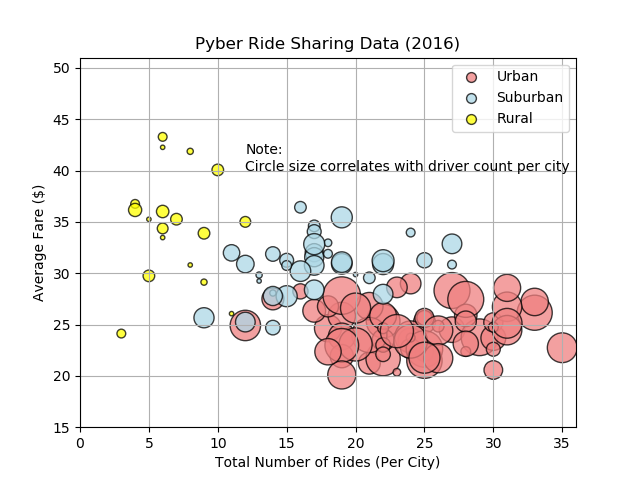

In [13]:
# creating DataFrame for each city
#Urban (total revenue, total number of rides, average fare, total number of drivers)
urban = merged_df.loc[merged_df['type'] == 'Urban']
urban_total_revenue = urban.groupby('city').sum()['fare']
urban_total_number_of_rides = urban.groupby('city').count()['ride_id']
urban_average_fare = round(urban_total_revenue/urban_total_number_of_rides,2)
urban_total_drivers =urban.drop_duplicates('city').set_index('city')['driver_count']

#suburban (total revenue, total number of rides, average fare, total number of drivers)
suburban = merged_df.loc[merged_df['type'] == 'Suburban']
suburban_total_revenue = suburban.groupby('city').sum()['fare']
suburban_total_number_of_rides = suburban.groupby('city').count()['ride_id']
suburban_average_fare = round(suburban_total_revenue/suburban_total_number_of_rides,2)
suburban_total_drivers = suburban.drop_duplicates('city').set_index('city')['driver_count']

#rural(total revenue, total number of rides, average fare, total number of drivers)
rural = merged_df.loc[merged_df['type'] == 'Rural']
rural_total_revenue = rural.groupby('city').sum()['fare']
rural_total_number_of_rides = rural.groupby('city').count()['ride_id']
rural_average_fare = round(rural_total_revenue/rural_total_number_of_rides, 2)
rural_total_drivers = rural.drop_duplicates('city').set_index('city')['driver_count']

#creating the the plot for urban,suburban and rural cities
#urban
plt.scatter(urban_total_number_of_rides, urban_average_fare, marker='o', 
            facecolors='lightcoral', edgecolors='black', 
            s=urban_total_drivers*10, alpha=0.75, label='Urban')
#suburban
plt.scatter(suburban_total_number_of_rides, suburban_average_fare, marker='o', 
            facecolors='lightblue', edgecolors='black', 
            s=suburban_total_drivers*10, alpha=0.75, label='Suburban')
#rural
plt.scatter(rural_total_number_of_rides, rural_average_fare, marker='o', 
            facecolors='yellow', edgecolors='black', 
            s=rural_total_drivers*10, alpha=0.75, label='Rural')
#labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0,36)
plt.ylabel("Average Fare ($)")
plt.ylim(15,51)
lgnd = plt.legend(scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.annotate(s='Note:\nCircle size correlates with driver count per city', xy=(0,15), xytext=(12,40))
plt.grid()
# plt.show()

<IPython.core.display.Javascript object>


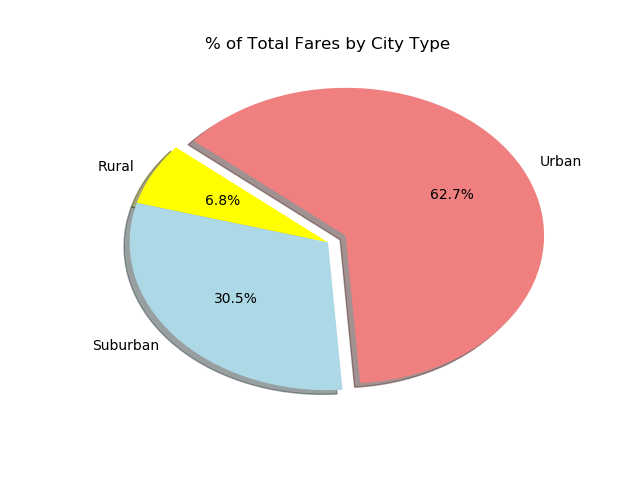

In [14]:
#Total Revenue for all cities
fare_total = merged_df['fare'].sum()

#total fares by type of city
fare_type = merged_df.groupby('type').sum()['fare']

#percent of revenye by city type
fare_percent = (fare_type/fare_total) 

#labels
labels = fare_percent.index

#size of slice, colors, explode
sizes = fare_percent
colors = ['yellow', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

#pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# plt.show()


# Total Rides by City Type

<IPython.core.display.Javascript object>


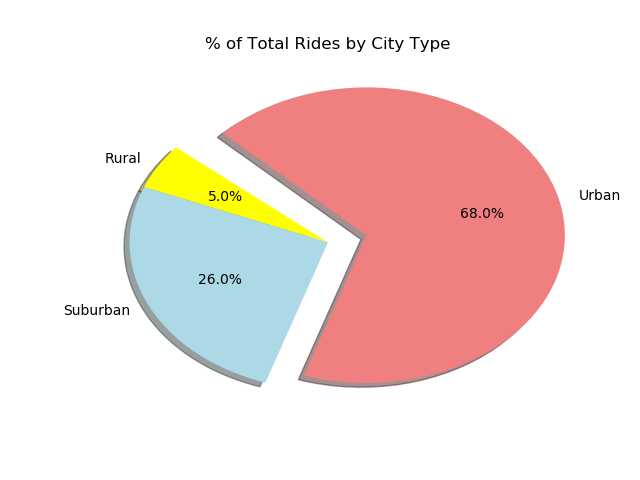

In [15]:
# Number of rides by the city type
ride_type = merged_df.groupby('type').count()['ride_id']
# total number of rides
total_rides = merged_df['fare'].count()
#percent of rides
ride_percent = round((ride_type/total_rides),2)
#labels,sizes, colors, explode
labels = ride_percent.index
sizes = ride_percent
explode = (0,0,0.2)
colors = ['yellow', 'lightblue', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.show()

# Total Drivers by City Type

<IPython.core.display.Javascript object>


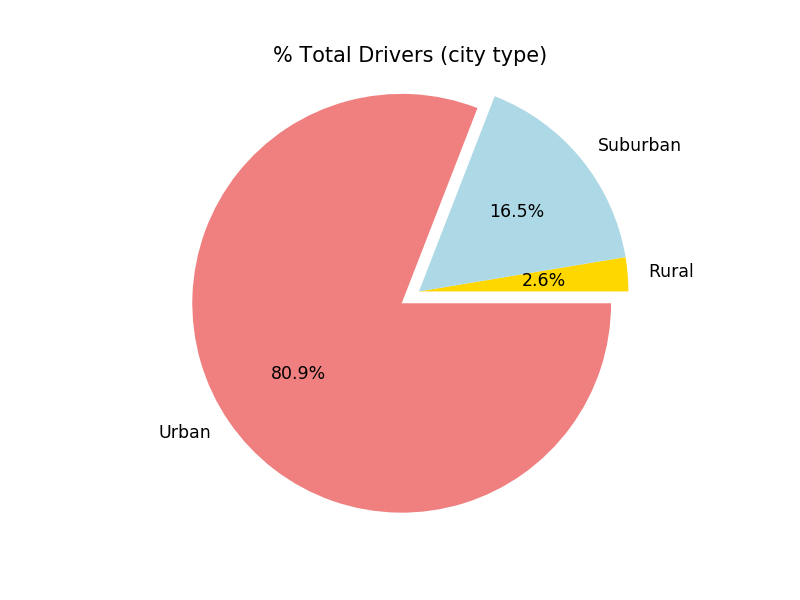

In [21]:
#drivers by city type
city_ride_dup = merged_df.drop_duplicates(['city', 'driver_count'], keep = 'first')
#total number of drivers
total_drivers = city_ride_dup.groupby('type')['driver_count'].sum()
plt.pie(total_drivers,explode=(0,0,0.1),colors = ["gold", "lightblue", "lightcoral"],
        autopct="%1.1f%%", labels=["Rural","Suburban","Urban"])
plt.axis("equal")
plt.title("% Total Drivers (city type)")
plt.show() 
